In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics


import seaborn as sb
%matplotlib inline

In [40]:
df = pd.read_json('LUCAS-SOIL-all-2018.json')
print(df.shape)
print(df.columns)

(18984, 27)
Index(['Depth', 'POINTID', 'pH_CaCl2', 'pH_H2O', 'EC', 'OC', 'CaCO3', 'P', 'N',
       'K', 'OC_(20-30_cm)', 'CaCO3_(20-30_cm)', 'Ox_Al', 'Ox_Fe', 'NUTS_0',
       'NUTS_1', 'NUTS_2', 'NUTS_3', 'TH_LAT', 'TH_LONG', 'SURVEY_DATE',
       'Elev', 'LC', 'LU', 'LC0_Desc', 'LC1_Desc', 'LU1_Desc'],
      dtype='object')


### Selecting soil property cols only and checking for NA values

   pH_CaCl2  pH_H2O     EC    OC  CaCO3     P    N      K
0       4.1    4.81   8.73  12.4    3.0   NaN  1.1  101.9
1       4.1    4.93   5.06  16.7    1.0   NaN  1.3   51.2
2       4.1    4.85  12.53  47.5    1.0  12.3  3.1  114.8
3       5.5    5.80  21.10  28.1    3.0   NaN  2.0  165.8
4       6.1    6.48  10.89  19.4    2.0   NaN  2.2   42.1


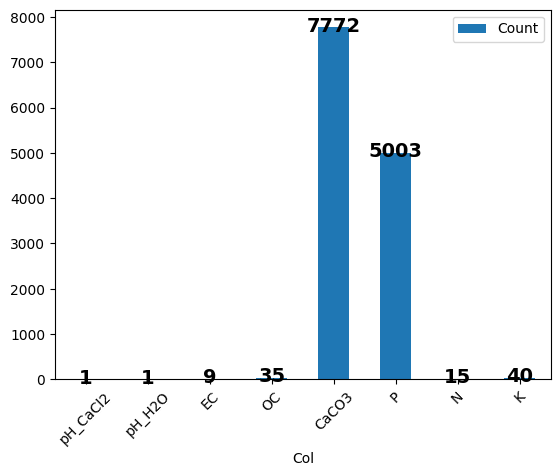

In [41]:
df = df[['pH_CaCl2', 'pH_H2O', 'EC', 'OC', 'CaCO3', 'P', 'N','K']]
print(df.head())
df2 = df.isna().sum().to_frame().reset_index()
df2.columns=["Col","Count"]
df2 =df2.drop(df2[df2["Count"]<=0].index)
plt = df2.plot.bar(x="Col",y="Count",rot=45)

for i, bar in enumerate(plt.axes.patches):
    h = bar.get_height()
    plt.axes.text(
        i, # bar index (x coordinate of text)
        h+30, # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=14)

In [42]:
df.dropna(inplace=True)
df.shape

(7607, 8)

# Data Exploration
### Corrrelations

In [43]:
corr=df.corr(method='spearman', numeric_only=True)
np.around(corr,2)

,pH_CaCl2,pH_H2O,EC,OC,CaCO3,P,N,K
pH_CaCl2,1.00,0.97,0.42,-0.52,0.80,-0.03,-0.38,0.53
pH_H2O,0.97,1.00,0.36,-0.54,0.79,-0.01,-0.40,0.52
EC,0.42,0.36,1.00,0.15,0.45,0.13,0.34,0.49
OC,-0.52,-0.54,0.15,1.00,-0.23,0.00,0.90,-0.06
CaCO3,0.80,0.79,0.45,-0.23,1.00,-0.02,-0.13,0.49
P,-0.03,-0.01,0.13,0.00,-0.02,1.00,0.06,0.22
N,-0.38,-0.40,0.34,0.90,-0.13,0.06,1.00,0.11
K,0.53,0.52,0.49,-0.06,0.49,0.22,0.11,1.00


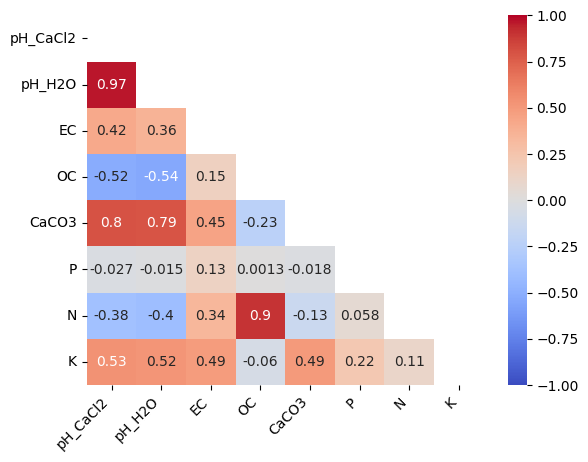

In [44]:
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

hm=sb.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    #cmap=sb.diverging_palette(20, 220, n=200),
    cmap='coolwarm',
    square=False,
    annot=True,    
    mask=mask
)
hm.set_xticklabels(
    hm.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

AttributeError: 'Axes' object has no attribute 'subtitle'

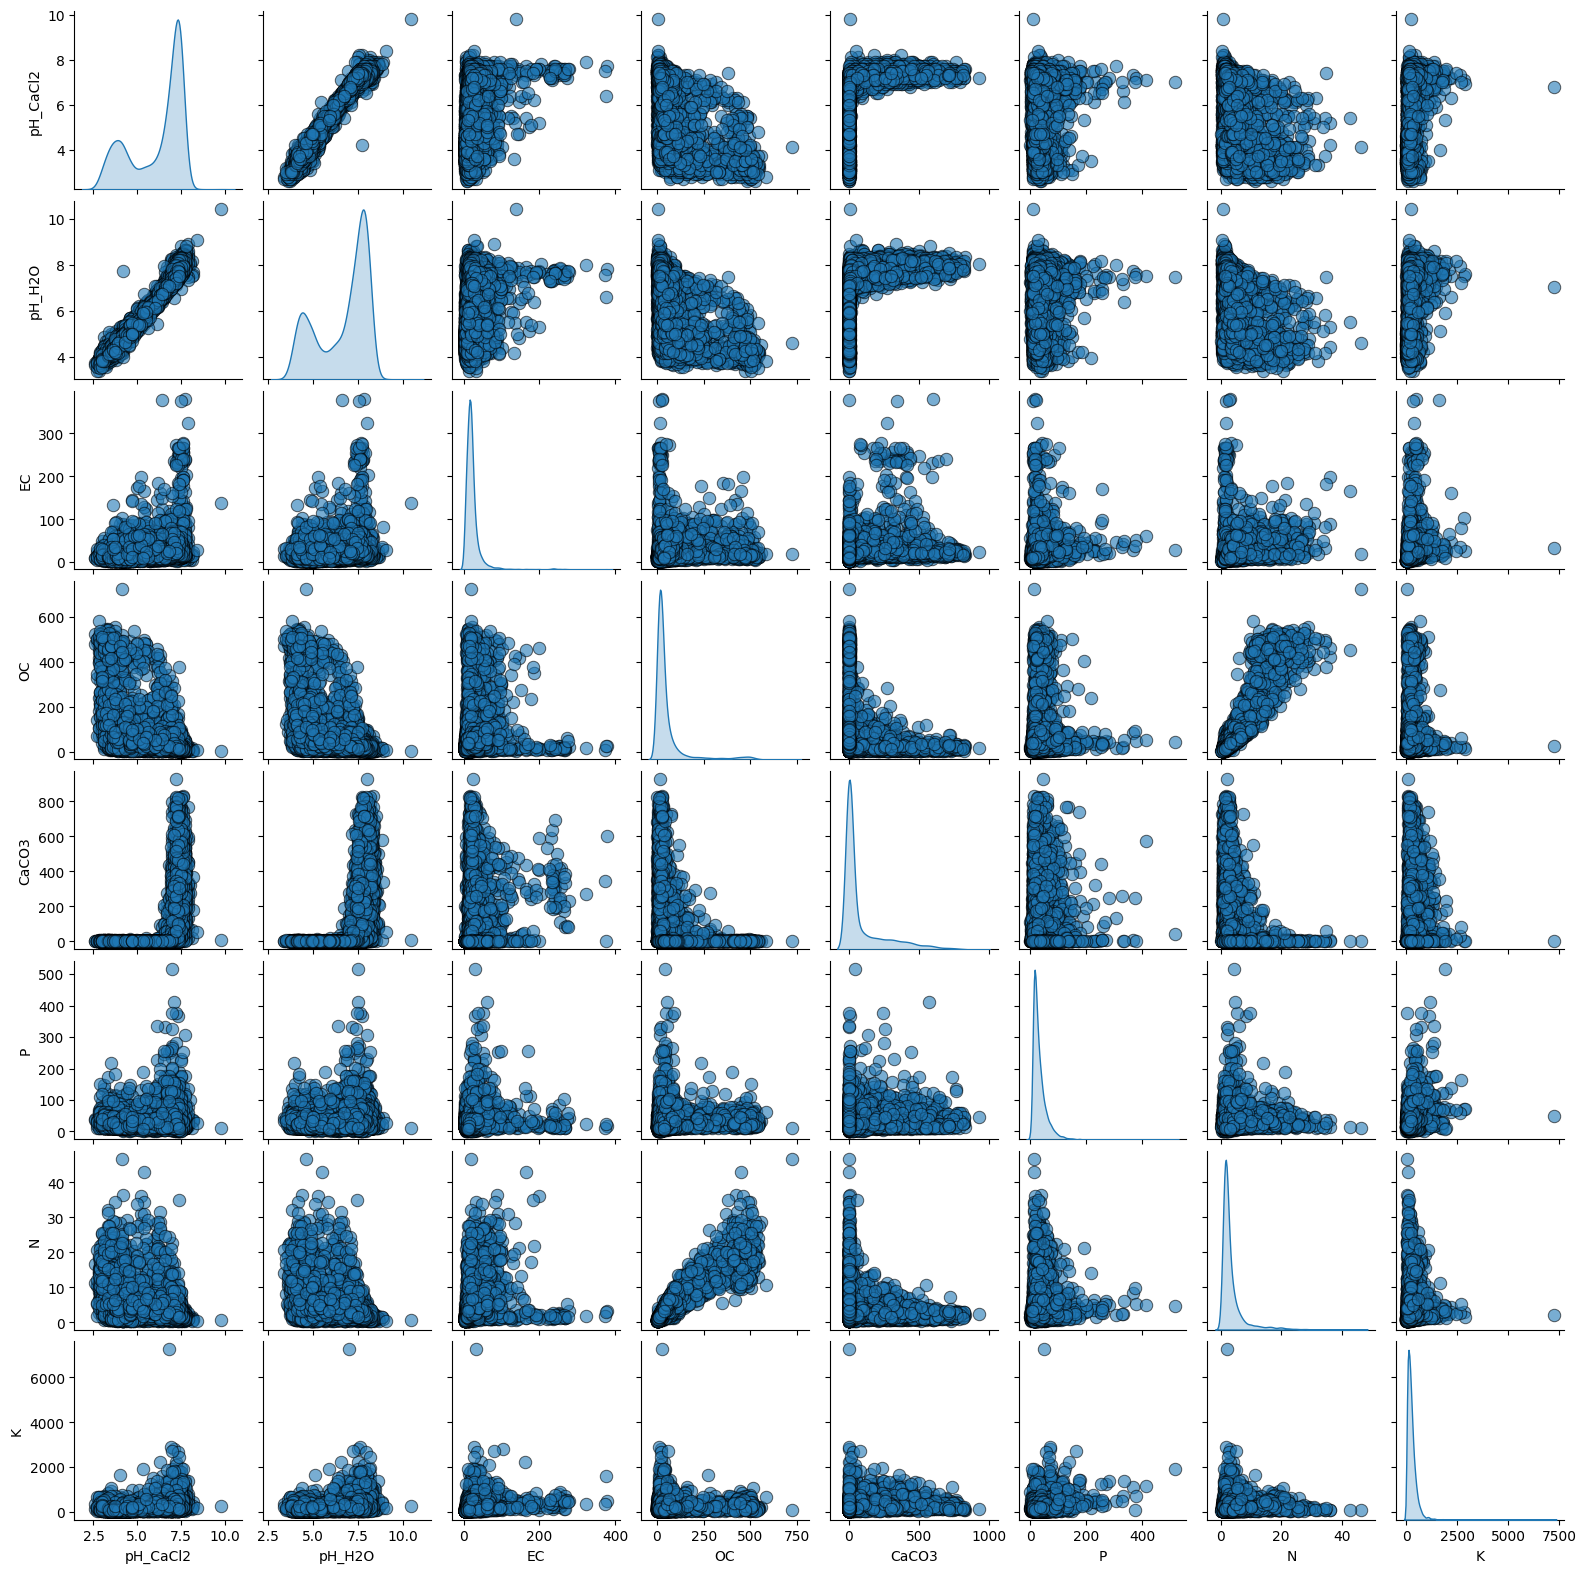

In [46]:
sb.pairplot(
            df,
            diag_kind='kde',
            plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
            height=2
            )
